# Homework

In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Problems [Part 1](./01_Revisiting_derivatives.md)

1. Consider the shape of a simply supported beam with a distributed load function,

$w(x) = -\frac{qx\left(L^3-2x^2L+x^3\right)}{24EI},$

* $L=1~m$
* $E=200e9~Pa$
* $I=\frac{0.01^4}{12}~m^4$
* $q=100~N/m$

__Plot the following derivatives using h=0.1m, x=0, 0.1, 0.2, ...1 m:__

a. Take the first derivative of the above function using a forward, backward, and central difference method

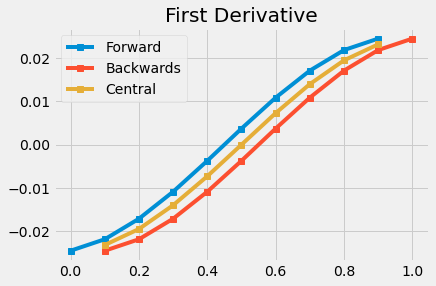

In [47]:
# 1A
L = 1
E = 200e9
I = 0.01**4/12
q = 100
w = lambda x: -q*x*(L**3 - 2*L*x**2 + x**3)/24/E/I

x = np.arange(0,11)*0.1

plt.plot(x[:-1], (w(x[1:]) - w(x[0:-1]))/0.1, 's-', label = 'Forward')
plt.plot(x[1:], (w(x[1:]) - w(x[0:-1]))/0.1, 's-', label = 'Backwards')
plt.plot(x[1:-1], (w(x[2:]) - w(x[0:-2]))/0.2, 's-', label = 'Central')
plt.legend(loc='best')
plt.title('First Derivative');

b. Take the second derivative of the above function using a forward, backward, and central difference method

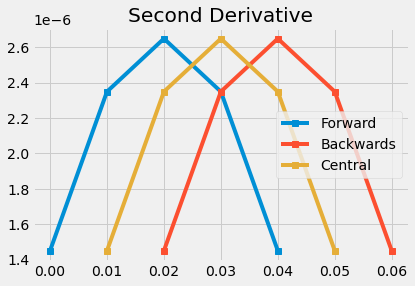

In [52]:
# 1.1b
plt.plot(x[:-2], ( w(x[2:]) - 2*w(x[1:-1]) + w(x[:-2]))/0.1**2, 's-', label = 'Forward')
plt.plot(x[2:], (w(x[2:]) - 2*w(x[1:-1]) + w(x[:-2]))/0.1**2, 's-', label='Backwards')
plt.plot(x[1:-1], ( w(x[2:]) - 2*w(x[1:-1]) + w(x[:-2])) / 0.1**2, 's-', label = 'Central') #Correct 
plt.legend(loc='best')
plt.title('Second Derivative');

c. Take the third derivative of the above function using a forward, backward, and central difference method

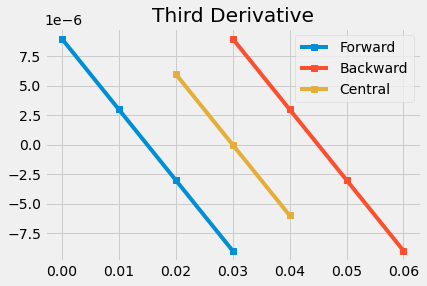

In [56]:
# 1.1c
plt.plot(x[:-3], (w(x[3:]) - 3*w(x[2:-1]) + 3*w(x[1:-2]) - w(x[:-3]))/0.1**3, 's-', label='Forward')
plt.plot(x[3:], (w(x[3:]) - 3*w(x[2:-1]) + 3*w(x[1:-2]) - w(x[:-3]))/0.1**3, 's-', label='Backward')
plt.plot(x[2:-2], (w(x[4:]) - 2*w(x[3:-1]) + 2*w(x[1:-3]) - w(x[:-4]))/(2*0.1**3), 's-', label='Central')
plt.legend(loc='best')
plt.title('Third Derivative');

2. Consider the temperature of a fin with conductive and convective heat transfer [analytical solution](https://en.wikipedia.org/wiki/Fin_(extended_surface)#Solutions) with x=0...60 mm connected to a $100^oC$ base surrounded by $20^oC$ air. 

$T(x)=20+80\frac{\cosh(s(L-x))+\frac{h}{sk}\sinh(s(L-x))}{\cosh(sL)+\frac{h}{sk}\sinh(sL)}$

* $s=\sqrt{\frac{2h}{kR}}$
* h=100 W/m/m/K
* k=200 W/m/K
* R=1E-3 radius in m
* L=60E-3  length in m


__Plot the first derivative of $T(x)$ using h=10 mm, x=0, 10, 20, ...60 mm (values given below):__

using the forward, backward, and central difference methods.

In [63]:
h=100 # W/m/m/K
k=200 # W/m/K
R=1E-3# radius in m
L=60E-3# length in m
s=np.sqrt(2*h/k/R)
x=np.arange(0,70,10)*1e-3 # m
T= 20+80*(np.cosh(s*L-s*x)+h/s/k*np.sinh(s*L-s*x))/(np.cosh(s*L)+h/s/k*np.sinh(s*L))

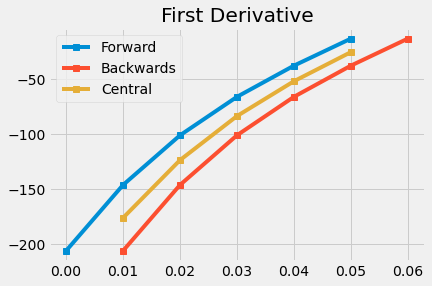

In [66]:
# 1.2a
w = lambda x: 20+80*(np.cosh(s*L-s*x)+h/s/k*np.sinh(s*L-s*x))/(np.cosh(s*L)+h/s/k*np.sinh(s*L))

plt.plot(x[:-1], (w(x[1:]) - w(x[0:-1]))/0.1, 's-', label = 'Forward')
plt.plot(x[1:], (w(x[1:]) - w(x[0:-1]))/0.1, 's-', label = 'Backwards')
plt.plot(x[1:-1], (w(x[2:]) - w(x[0:-2]))/0.2, 's-', label = 'Central')
plt.legend(loc='best')
plt.title('First Derivative');

## Problems [Part 2](./02_Keep_it_steady.md)

![Thermal fin connected to a constant temperature heat sink](../images/thermal_connect.png)

1. Consider the thermal fin shown above connected to a heat sink with constant temperature. $h'=\frac{2h}{\kappa R}$ is the modified convective heat transfer for the fin. And your boundary conditions give us values for $T_{0}~and~T_{7}.$ You can plug in constants for forced air convection, $h=100~W/m^2K$, aluminum fin, $\kappa=200~W/mK$, and 60-mm-long and 1-mm-radius fin, the air is room temperature, $T_{\infty}=20^oC$, the base is $T_{base}=T_{0}=100^oC$, and the sink is $T_{sink}=25^oC$. Use the following finite difference equation to solve for the temperature along the fin and the heat flux through the fin given, 

$T(x=0)=100^oC,~and$

$T(x=60~mm)=25^oC.$

$\frac{T_{i-1}-2T_i+T_{i+1}}{\Delta x^2}+ h'(T_{\infty}-T_i) = 0$

a. Set up and solve the finite difference equations for $\Delta x=10~mm$, plot the resulting temperature $T(x)$. 

b. Set up and solve the finite difference equations for $\Delta x=5~mm$, plot the resulting temperature $T(x)$. 

c. Set up and solve the finite difference equations for $\Delta x=1~mm$, plot the resulting temperature $T(x)$. 

d. Plot the heat flux through the fin, $-\kappa \frac{dT}{dx}$.

2. Consider the encastre beam shown in the __Static Beam deflections__ section. Use the following material and geometry (1-m steel rod 1-cm-by-1-cm) with 100 N/m load applied

$EI \frac{d^4w}{dx^4} = q.$

You can approximate the function as a finite difference approximation as such,

$\frac{d^4w}{dx^4} \approx \frac{w(x_{i+2})−4w(x_{i+1})+6w(x_i)−4w(x_{i-1})+w(x_{i-2})}{h^4}=\frac{q}{EI}.$

* $L=1~m$
* $E=200e9~Pa$
* $I=\frac{0.01^4}{12}~m^4$
* $q=100~N/m$

a. Solve for the four integration constants using the boundary conditions shown in the __Static Beam deflections__ section. $w(x)=\frac{q_0x^4}{24}+\frac{Ax^3}{6}+\frac{Bx^2}{2}+Cx+D$

b. Create a finite difference approximation with 10, 20, 30, and 40 segments. 

c. Plot the error between the maximum predicted numerical deflection (b) and the analytical deflection (a). What is the convergence rate of the finite difference approximation?

## Problems [Part 3](./03_Good_Vibrations.md)

![Two masses connected to 3 springs](../images/spring_mass.png)

*Two masses connected to 3 springs*

1. Use the 2-DOF harmonic oscillator shown considering $m_1=m_2=0.1~kg$, $k_1=k_3=1000~N/m,$ and $k_2=500~N/m$. 

a. Calculate the natural frequencies and mode shapes _(eigenvectors)_.

b. Plot the position of $x_1~and~x_2$ if the masses are at rest when mass 2 is given an initial velocity of 2 m/s.

2. Consider the G-string on the guitar, L=0.64 m, $\mu=1.14~g/m,$ and T=71.81 N [1]. 

__Guitar string equation:__ $\mu\frac{\partial^2 y}{\partial t^2}=T\frac{\partial ^2 y}{\partial x^2}$

a. Calculate the first and second natural frequencies using 6, 30, 45, and 60 nodes. Plot the mode shapes to demonstrate convergence.

b. Use 60 nodes to create an animation using the following initial condition, $y(x,0)=0$ and $\dot{y}(L/2,0)=2~m/s.$ e.g. `dy[30,0]=2`.

c. Use 60 nodes to create an audio display using the following initial condition, $y(x,0)=0$ and $\dot{y}(L/2,0)=2~m/s.$ e.g. `dy[30,0]=2`.